# Physics of a macrospin in time varying fields

In this notebook we will solve the same Landau–Lifshitz–Gilbert equation as in the first notebook but this time we will see more intresting physics as the applied field will not be uniform (in magnitude and direction) over the time. We will use the Permalloy parameters.

In [1]:
import numpy as np

alpha = np.float128(0.2)
Ms = np.float128(8.0e5)
gamma = np.float128(2.211e5)
t0 = 1/(Ms*gamma)

#initial magentization direction
#m0 = np.array([np.sqrt(3)/2,0,1/2],dtype=np.float128) #unit magnetization in x-z plane, with angle 60deg w.r.t z dir

<IPython.core.display.Javascript object>


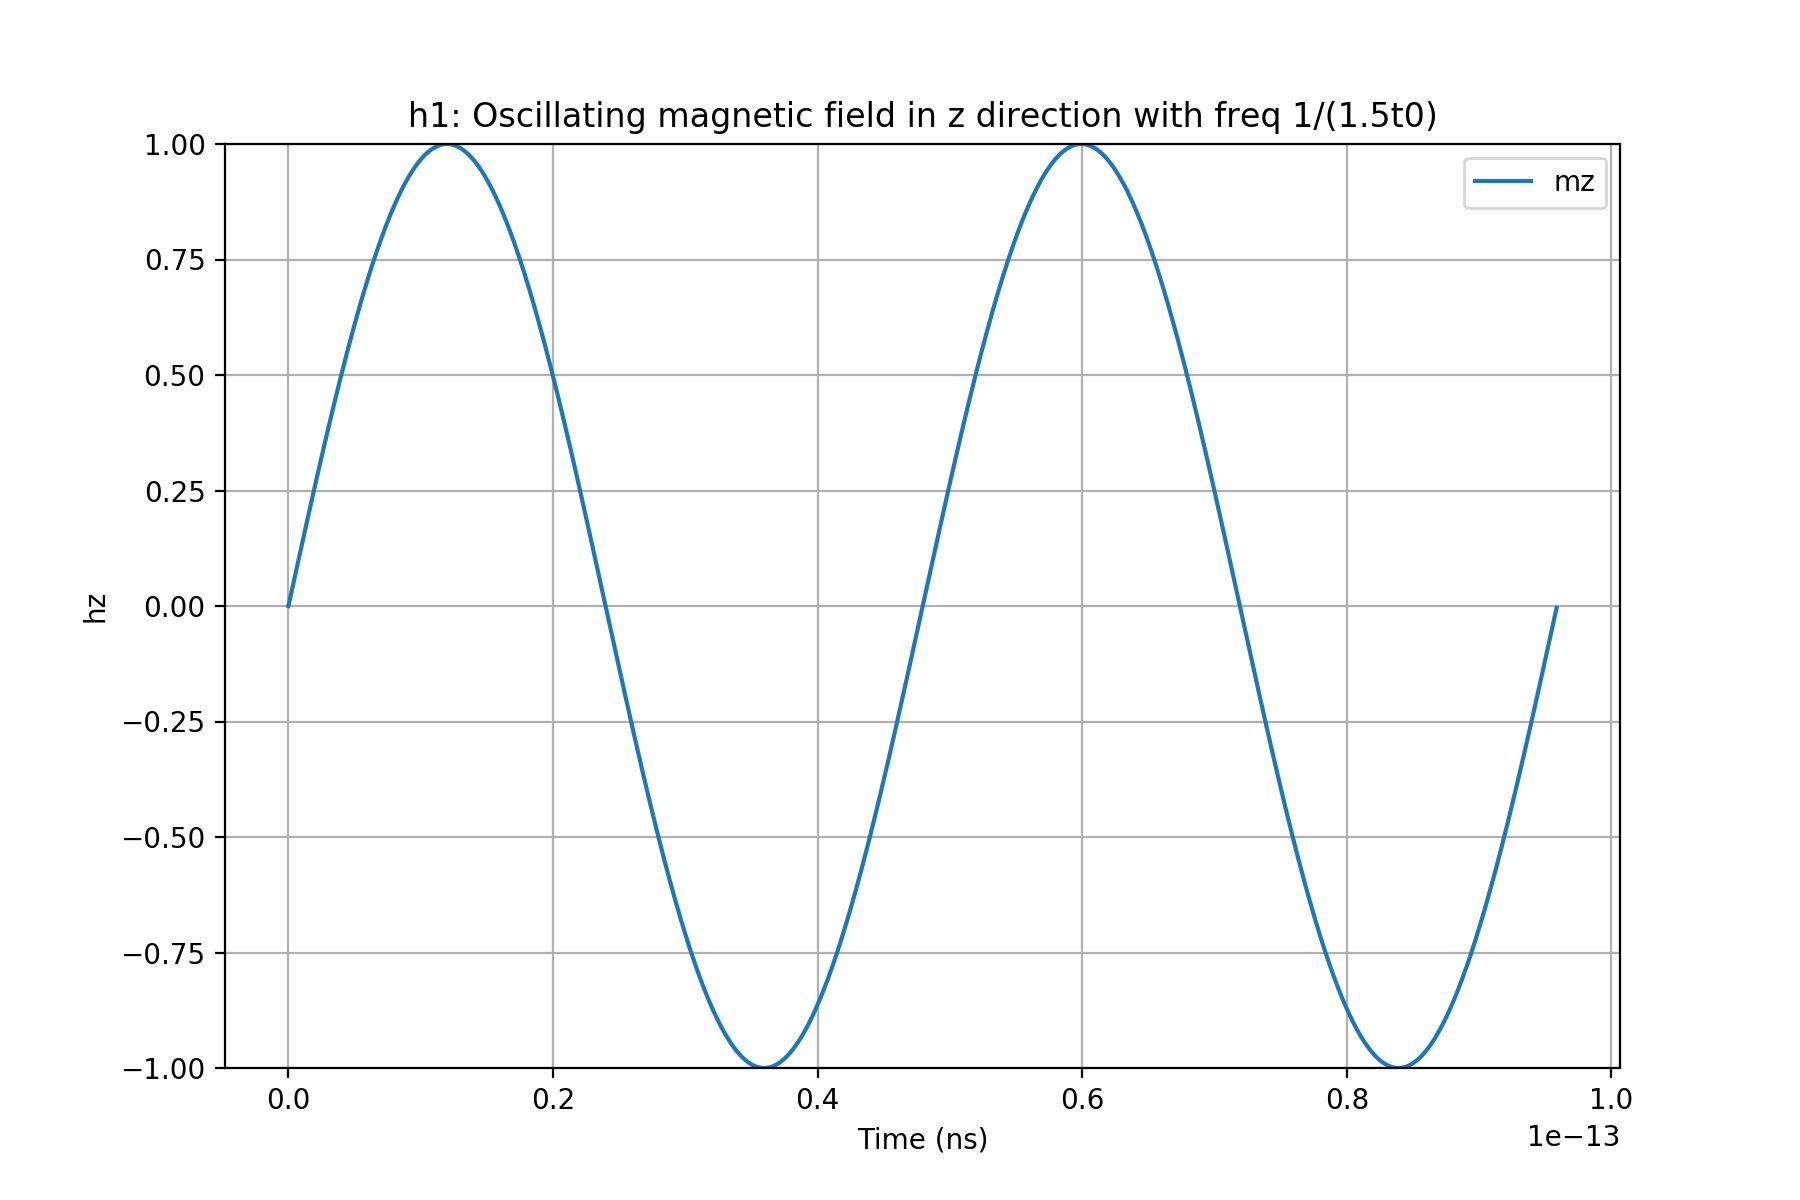

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

def h1(t,h0 = np.array([0,0,1],dtype=np.float128),w0=(2.0*np.pi)/(1.5*t0),phase=0,M=1.0):
    '''
    Normalized applied magnetic field in the h0 direction,
    time varying with a sine form
    
    input:
    =======
        * t: time at which we want to evaluate the field
        * h0: unitary vector 
        * w0: angular frequency of the applied field
        * M: magnitude to multiply Ms to get maximum value
        * phase: phase added to the field (in rad)
    '''
    h_ = M*np.sin(t*w0+phase)*h0
    return h_


t = np.arange(0,3*t0,t0/1000)
h = np.array([h1(i) for i in t],dtype=np.float128)
hz = [m_[2] for m_ in h]

fig = plt.figure(figsize=(9,6))
plt.plot(t*t0*np.float128(1e9),hz,label="mz")

plt.title("h1: Oscillating magnetic field in z direction with freq 1/(1.5t0)")
plt.xlabel("Time (ns)")
plt.ylabel("hz")
plt.ylim(-1,1)

plt.legend()
plt.grid()

In [3]:
def f(h_,m_,alpha = alpha):
    return -(np.cross(m_,h_) + alpha*np.cross(m_,np.cross(m_,h_)))/(1+np.power(alpha,2.0))

def MagnetizationEvolutionRK4(h,
                              m0 = np.array([np.sqrt(3)/2,0,1/2],dtype=np.float128),
                              alpha = np.float128(0.2),
                              t0 = t0,
                              tf = 100,
                              timestep = 1/200):
    '''
    Solve LLG equation over time integrating fourth order Runge Kutta
    inputs:
    ==========
        * h, normalized (to Ms) static applied field vector
        * m, unitary vector with initial magnetization direction
        * alpha, the damping constant (unitless)
        * t0 = 1/(gamma*Ms) where gamma is gyromagnetic ratio. This is characteristic time scale in seconds
        * timestep: number of integration steps over t0
    outputs:
    ==========
        * (t,mfx,mfy,mfz) 
        
        * t is the timestep
        * mfx is the x projection of m unitary vector
        * mfy is the y ...
        * mfz is the z ...
    '''
    
    m_ = np.copy(m0)
    t_ = np.float128(0)
    
    t_arr = np.array([],np.float128)
    m_arr = list()
    
    #print("Time evolution from 0ns to {}ns".format(tf*t0*np.float128(1e9)))
    while t_ < tf:
        t_+=timestep
        h_ = h(t_) #value of field at time t_
        
        k1 = f(h_,m_,alpha)*timestep
        k2 = f(h_,m_ + k1/2.0,alpha)*timestep
        k3 = f(h_,m_ + k2/2.0,alpha)*timestep
        k4 = f(h_,m_ + k3,alpha)*timestep
        
        m_ += k1/6.0 + k2/3.0 + k3/3.0 +k4/6.0
        m_ = m_/np.linalg.norm(m_)
        
        t_arr = np.append(t_arr,t_)
        m_arr.append(m_)
    
    return (t_arr,m_arr)
    

In [4]:
def CartesianToPolar(m0,m1):
    '''
    Inputs:
    ========
    * two components of a unitary vector
    
    Outputs:
    ========
    * r radius of the vector in polar coords
    * theta angle of the vector in polar coords
    '''
    r = np.array([],dtype=np.float128)
    theta = np.array([],dtype=np.float128)
    
    for c in zip(m0,m1):
        r = np.append(r,np.sqrt(np.power(c[0],2.0)+np.power(c[1],2.0)))
        theta = np.append(theta,np.arctan2(c[1],c[0]))
        
    return r,theta

## Evolution of magnetization for sine field in the z direction and magnitude Ms

<IPython.core.display.Javascript object>


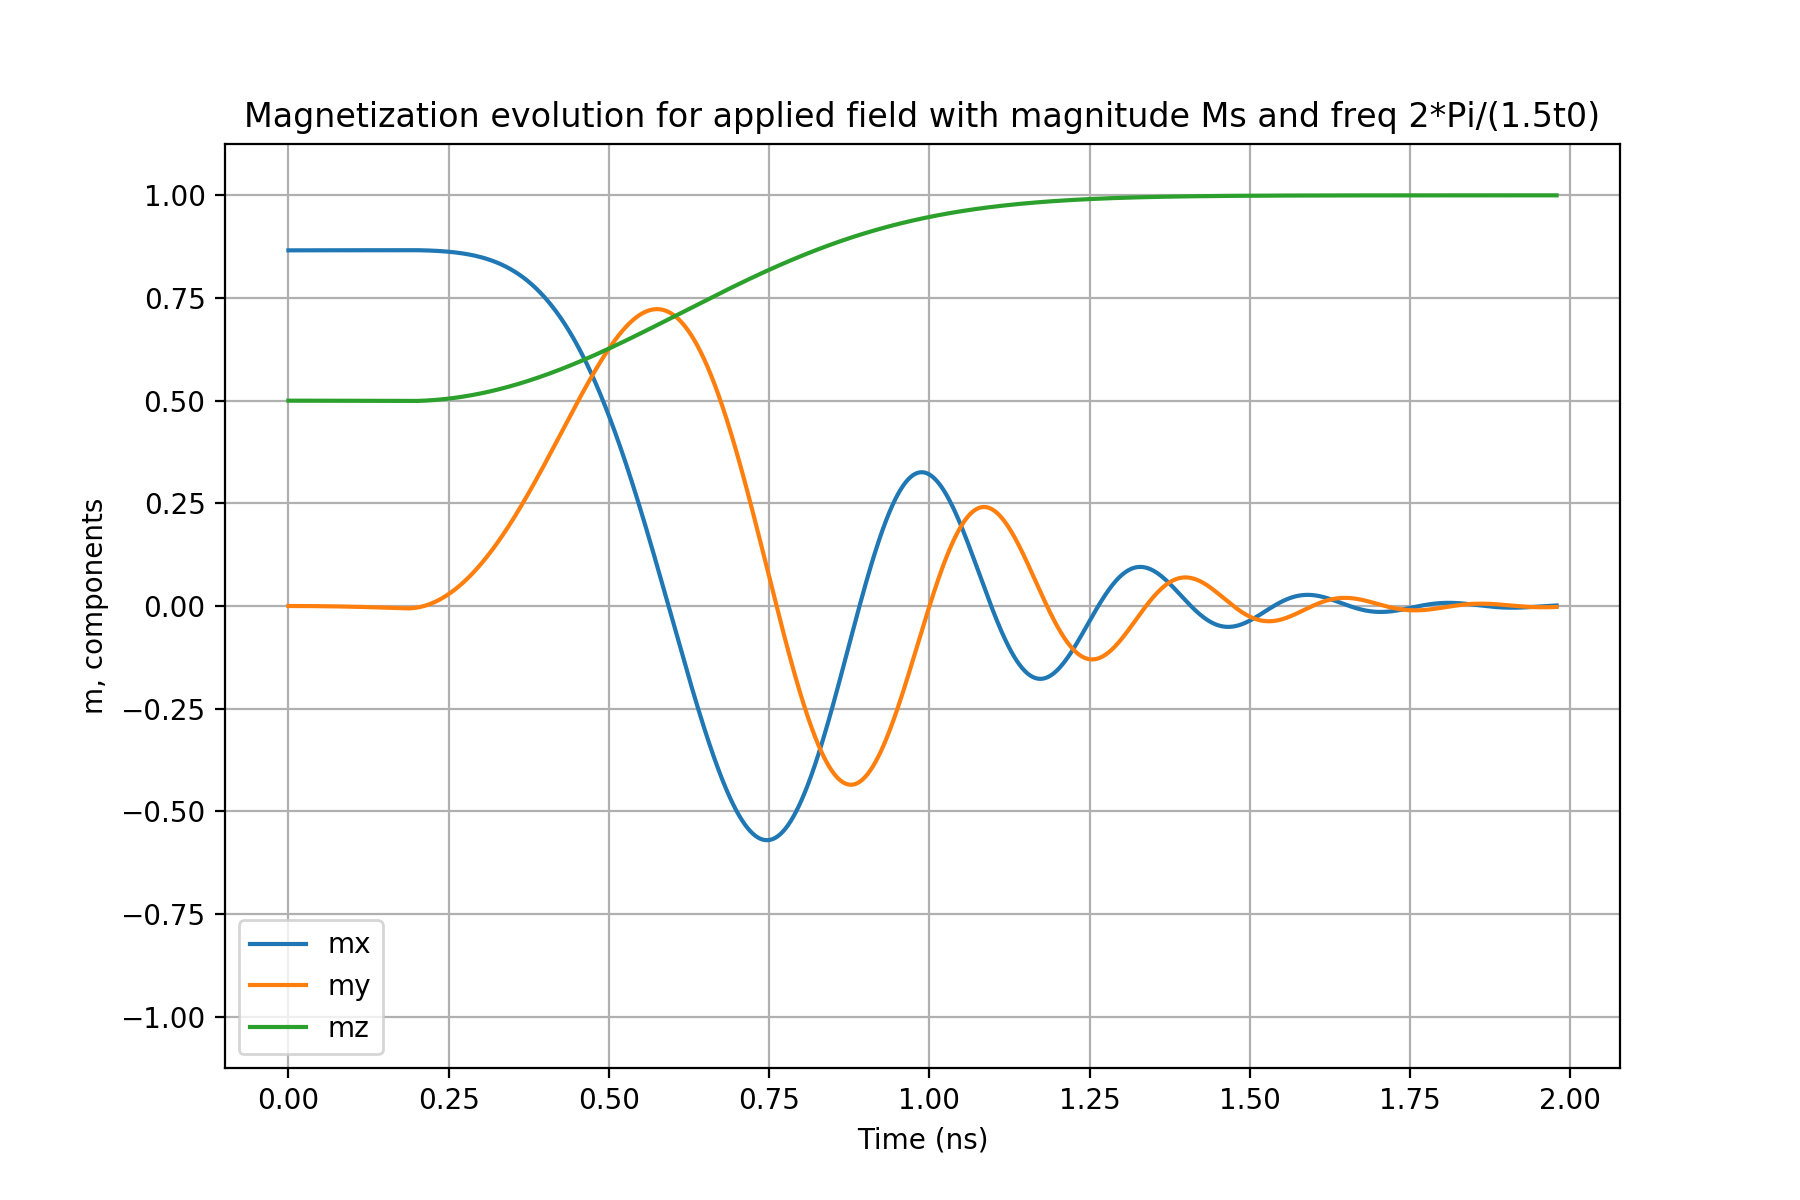

In [5]:
t_500,m_500 = MagnetizationEvolutionRK4(h1,tf=350,timestep=1/500)

mx_500 = [m_[0] for m_ in m_500]
my_500 = [m_[1] for m_ in m_500]
mz_500 = [m_[2] for m_ in m_500]

fig = plt.figure(figsize=(9,6))
plt.plot(t_500*t0*np.float128(1e9),mx_500,label="mx")
plt.plot(t_500*t0*np.float128(1e9),my_500,label="my")
plt.plot(t_500*t0*np.float128(1e9),mz_500,label="mz")

plt.title("Magnetization evolution for applied field with magnitude Ms and freq 2*Pi/(1.5t0)")
plt.xlabel("Time (ns)")
plt.ylabel("m, components")
plt.ylim(-1.125,1.125)

plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


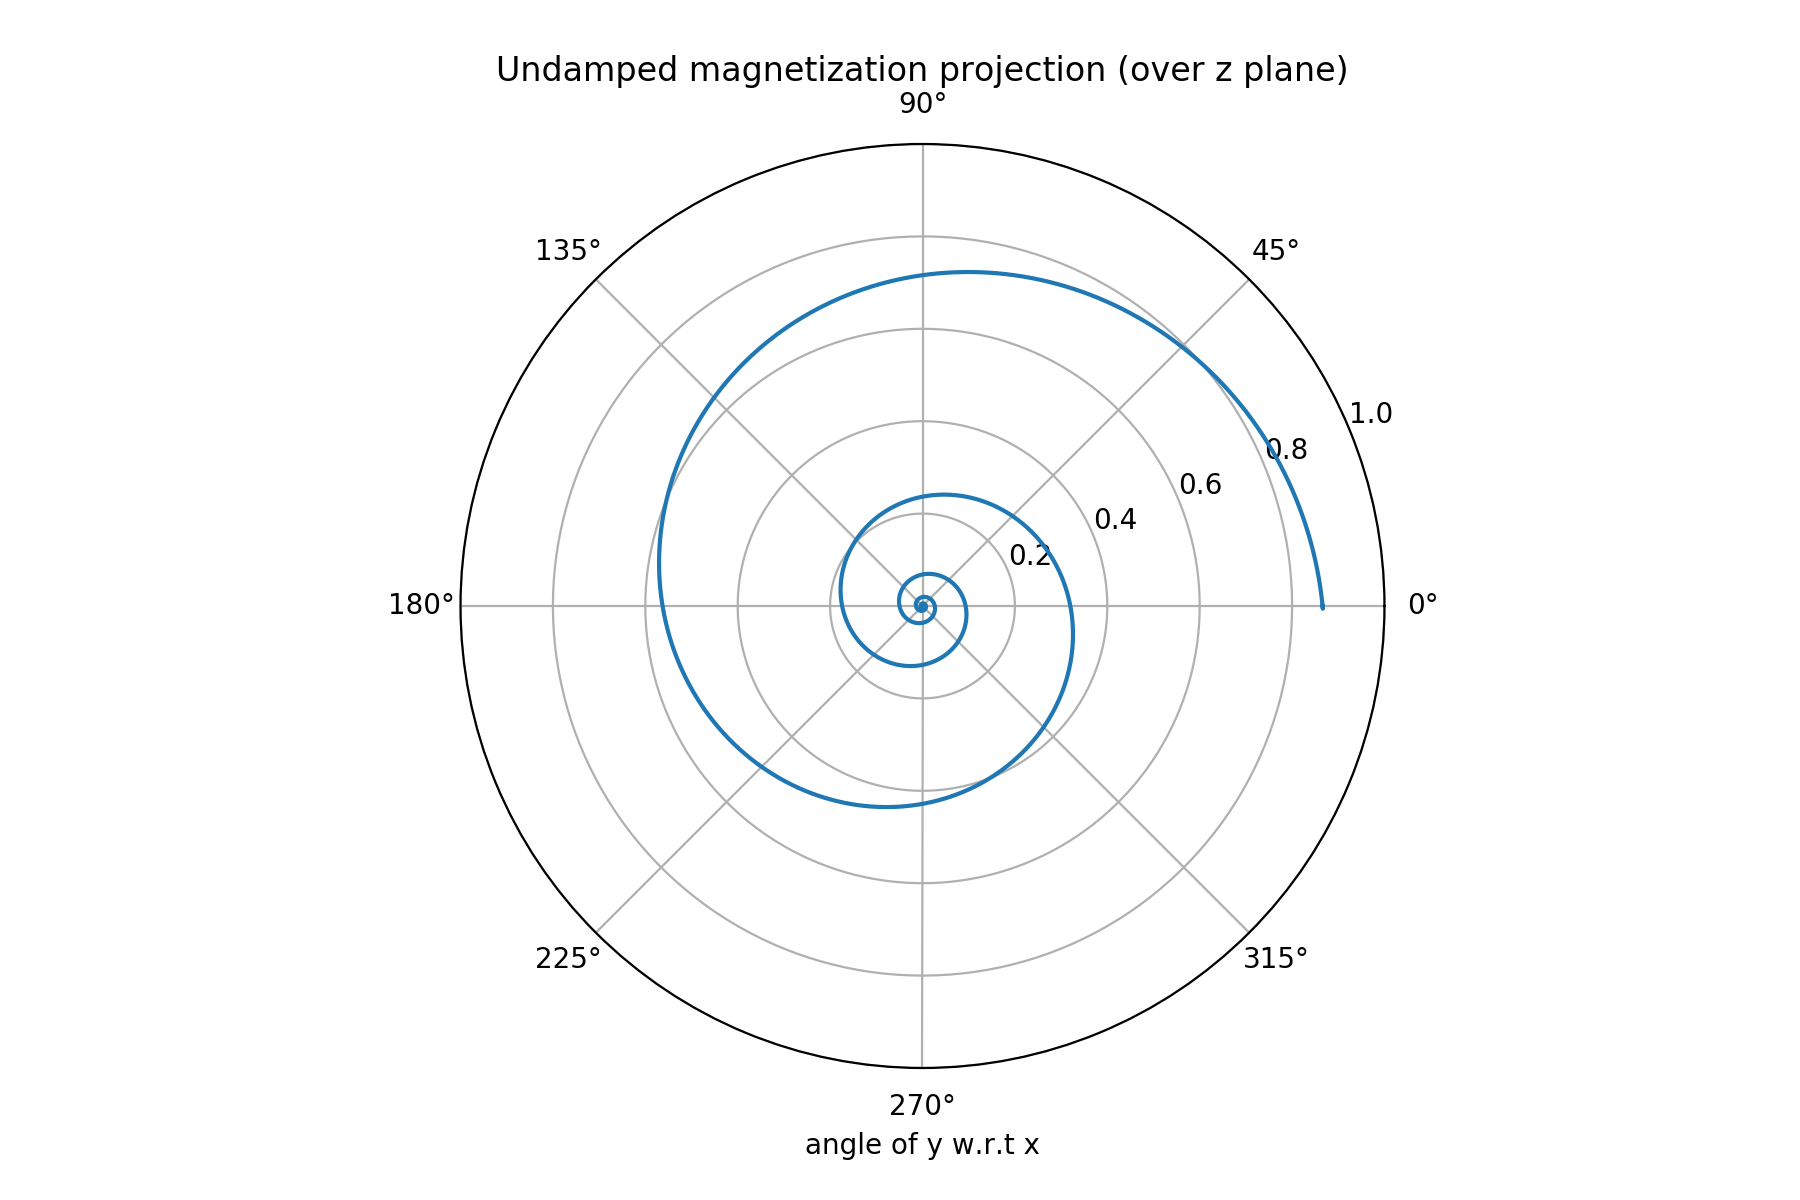

Text(0.5,1.05,'Undamped magnetization projection (over z plane)')

In [6]:
r,theta = CartesianToPolar(mx_500,my_500)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.xlabel("angle of y w.r.t x")

plt.ylim(0,1)
plt.title("Undamped magnetization projection (over z plane)")

## Evolution of magnetization for sine field in the z direction and magnitude 2Ms

<IPython.core.display.Javascript object>


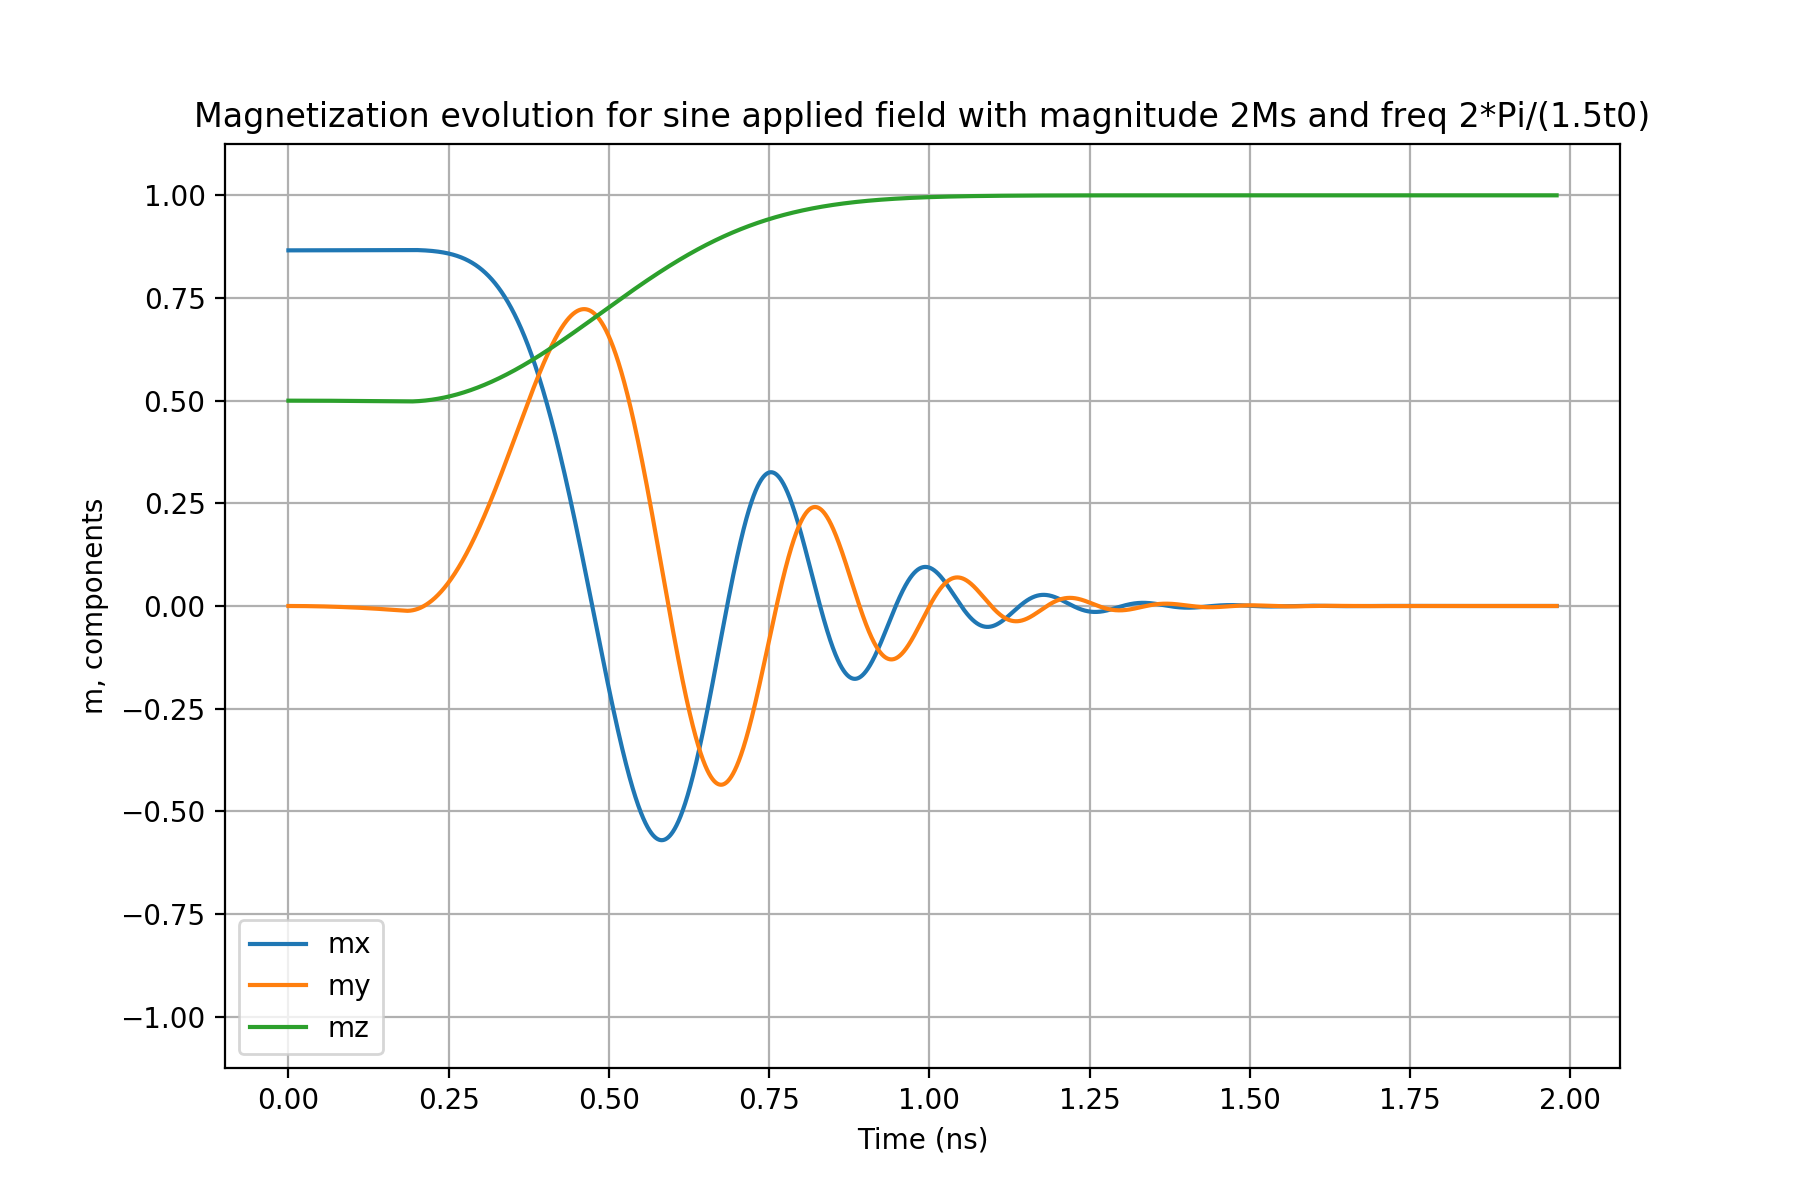

In [7]:
h11 = lambda x: h1(x,M=2.0)
t_2M,m_2M = MagnetizationEvolutionRK4(h = h11,tf=350,timestep=1/500)

mx_2M = [m_[0] for m_ in m_2M]
my_2M = [m_[1] for m_ in m_2M]
mz_2M = [m_[2] for m_ in m_2M]

fig = plt.figure(figsize=(9,6))
plt.plot(t_2M*t0*np.float128(1e9),mx_2M,label="mx")
plt.plot(t_2M*t0*np.float128(1e9),my_2M,label="my")
plt.plot(t_2M*t0*np.float128(1e9),mz_2M,label="mz")

plt.title("Magnetization evolution for sine applied field with magnitude 2Ms and freq 2*Pi/(1.5t0)")
plt.xlabel("Time (ns)")
plt.ylabel("m, components")
plt.ylim(-1.125,1.125)

plt.legend()
plt.grid()

Let's plot the two magnetizations at the same time to compare

<IPython.core.display.Javascript object>


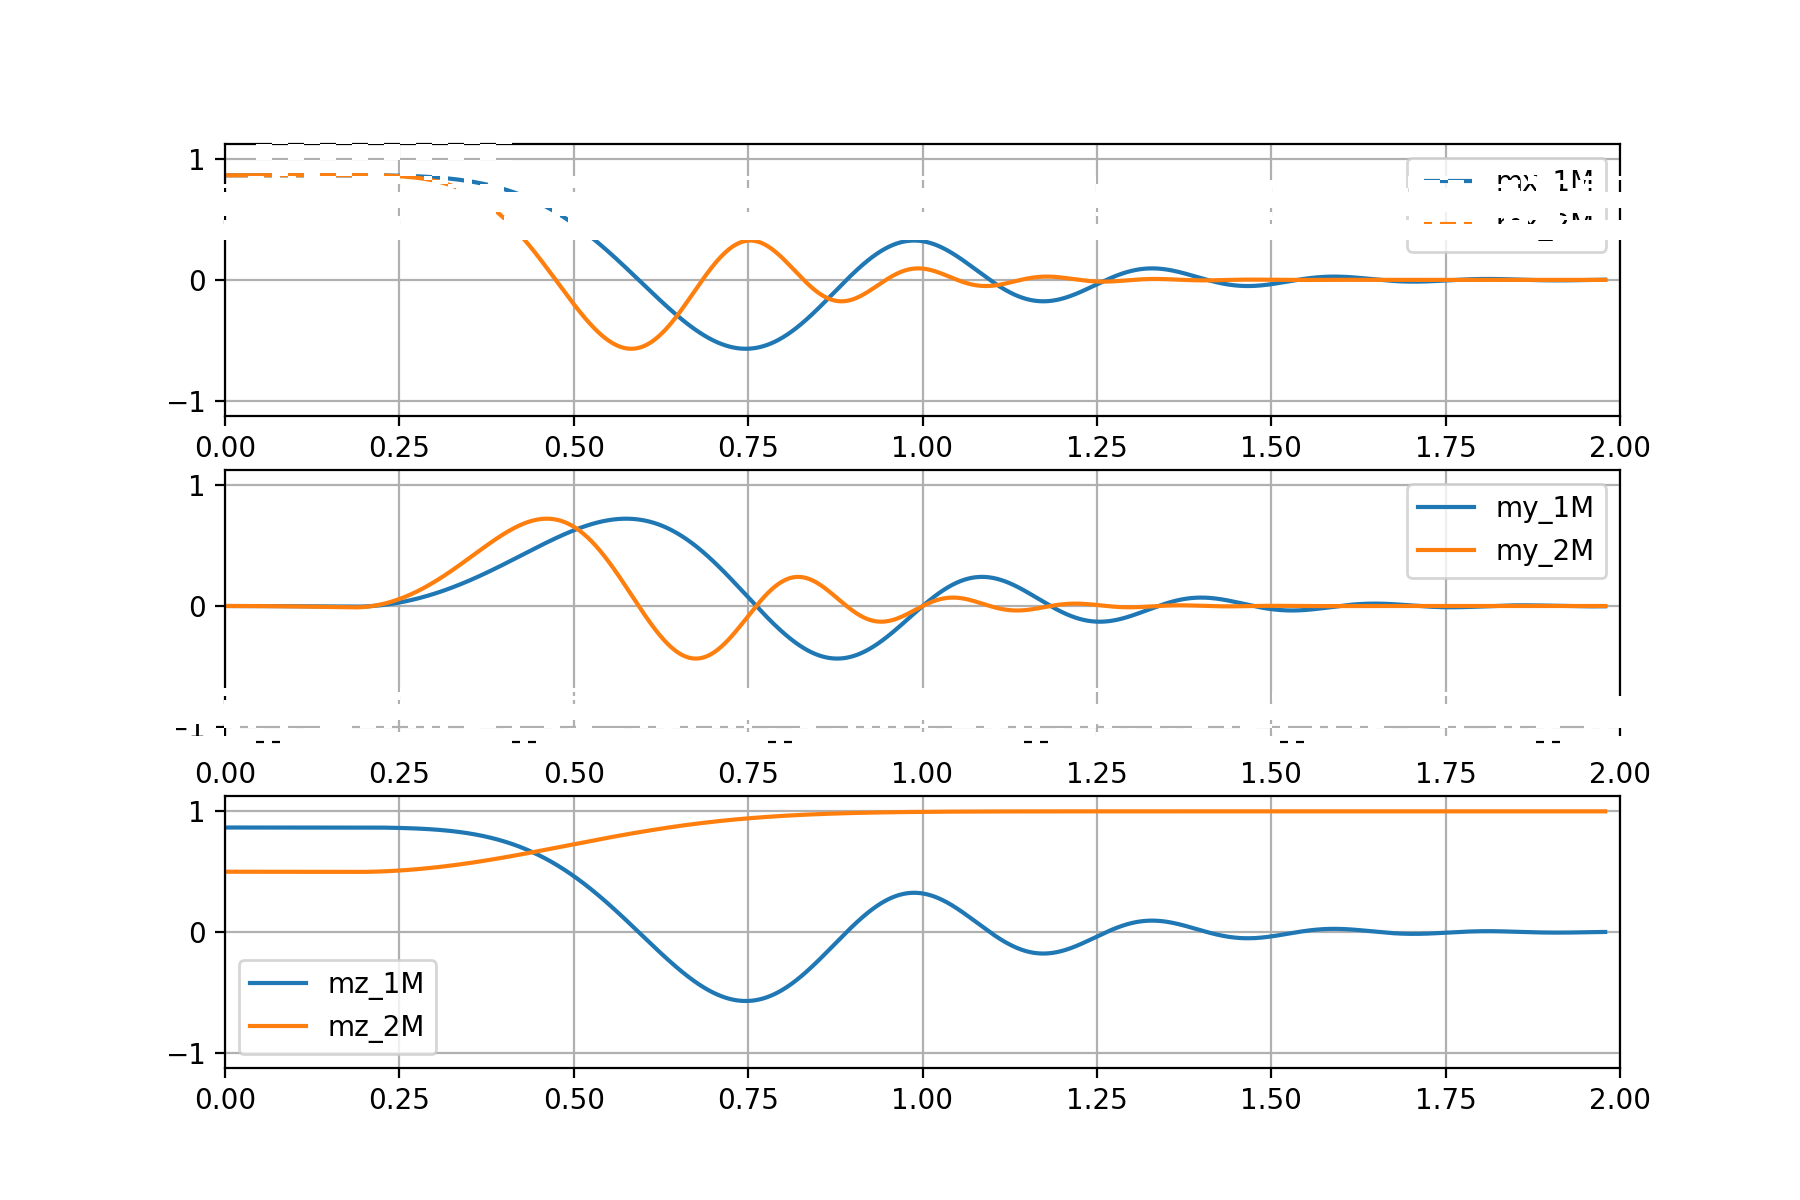

(0, 2)

In [8]:
#fig = plt.figure(figsize=(9,6))

fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharey=True)

fig.set_figheight(6)
fig.set_figwidth(9)

ax1.plot(t_500*t0*np.float128(1e9),mx_500,label="mx_1M")
ax1.plot(t_2M*t0*np.float128(1e9),mx_2M,label="mx_2M")
ax1.legend()
ax1.grid()
ax1.set_ylim(-1.125,1.125)
ax1.set_xlim(0,2)

ax2.plot(t_500*t0*np.float128(1e9),my_500,label="my_1M")
ax2.plot(t_2M*t0*np.float128(1e9),my_2M,label="my_2M")
ax2.legend()
ax2.grid()
ax2.set_ylim(-1.125,1.125)
ax2.set_xlim(0,2)

ax3.plot(t_500*t0*np.float128(1e9),mx_500,label="mz_1M")
ax3.plot(t_2M*t0*np.float128(1e9),mz_2M,label="mz_2M")
ax3.legend()
ax3.grid()
ax3.set_ylim(-1.125,1.125)
ax3.set_xlim(0,2)

see that the the larger the field the more reactive is the magnetization. This could be somehow expected but I also expected the magnetization to switch from +z to -z, perhaps is the frequency of the field, let's play with this parameter.

## Evolution of magnetization for sine field in the z direction and magnitude 2Ms, different frequencies

<IPython.core.display.Javascript object>


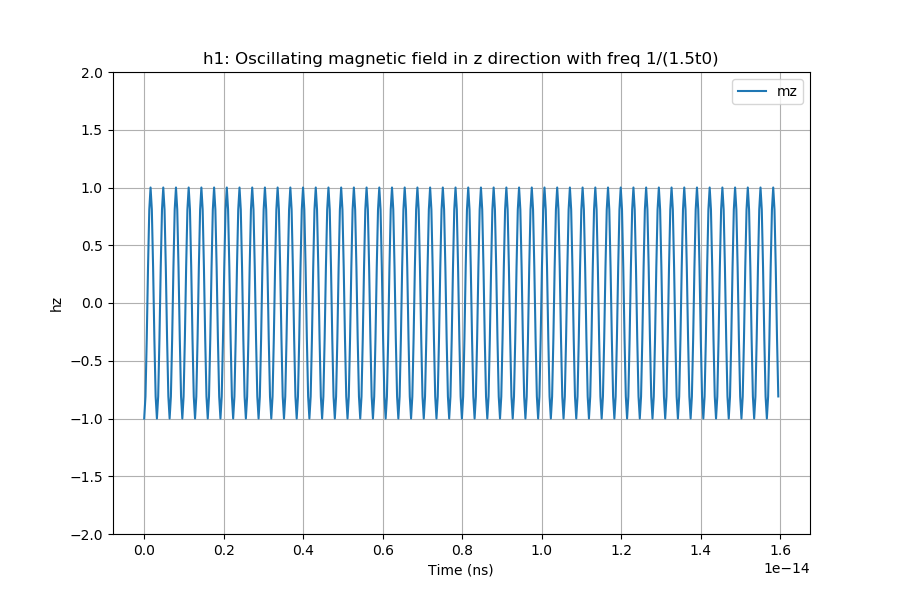

In [48]:
h12 = lambda x: h1(x,M=1.0,w0=(2.0*np.pi)/(0.01*t0),phase=3.0*np.pi/2.0)

t = np.arange(0,0.5*t0,t0/1000)
h = np.array([h12(i) for i in t],dtype=np.float128)
hz = [m_[2] for m_ in h]

fig = plt.figure(figsize=(9,6))
plt.plot(t*t0*np.float128(1e9),hz,label="mz")

plt.title("h1: Oscillating magnetic field in z direction with freq 1/(1.5t0)")
plt.xlabel("Time (ns)")
plt.ylabel("hz")
plt.ylim(-2,2)

plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


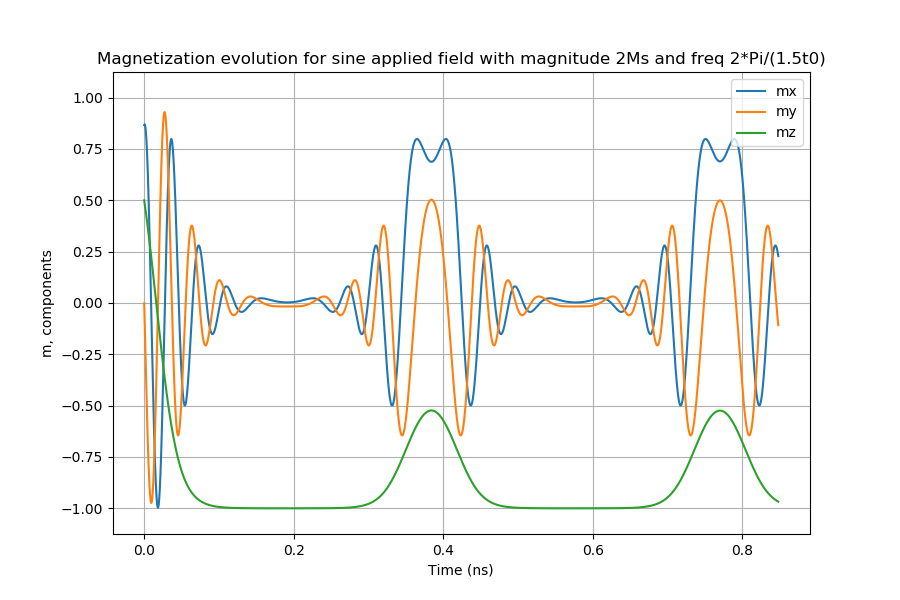

In [45]:
t_2M_f1,m_2M_f1 = MagnetizationEvolutionRK4(h = h12,tf=150,timestep=1/1000)

mx_2M_f1 = [m_[0] for m_ in m_2M_f1]
my_2M_f1 = [m_[1] for m_ in m_2M_f1]
mz_2M_f1 = [m_[2] for m_ in m_2M_f1]

fig = plt.figure(figsize=(9,6))
plt.plot(t_2M_f1*t0*np.float128(1e9),mx_2M_f1,label="mx")
plt.plot(t_2M_f1*t0*np.float128(1e9),my_2M_f1,label="my")
plt.plot(t_2M_f1*t0*np.float128(1e9),mz_2M_f1,label="mz")

plt.title("Magnetization evolution for sine applied field with magnitude 2Ms and freq 2*Pi/(1.5t0)")
plt.xlabel("Time (ns)")
plt.ylabel("m, components")
plt.ylim(-1.125,1.125)

plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


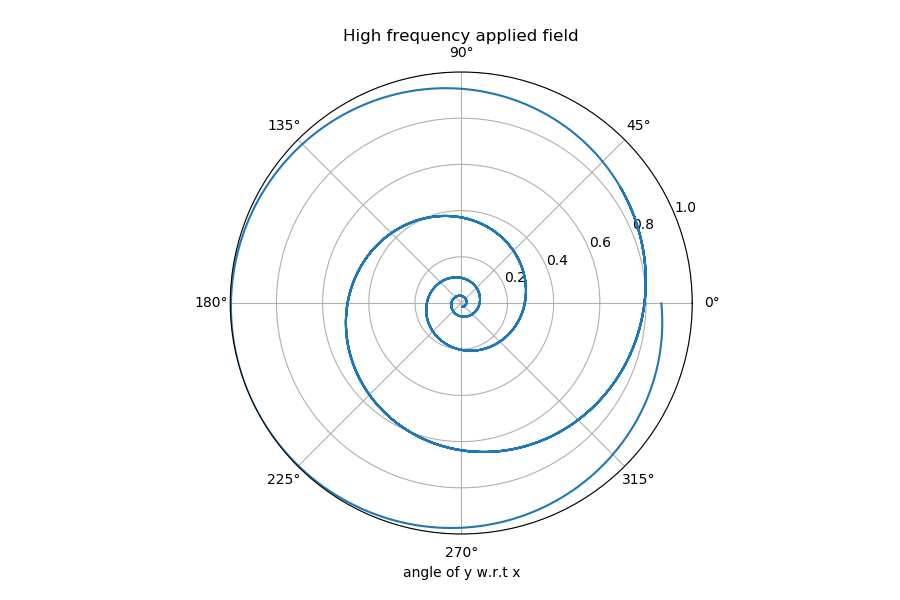

Text(0.5,1.05,'High frequency applied field')

In [47]:
r,theta = CartesianToPolar(mx_2M_f1,my_2M_f1)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.xlabel("angle of y w.r.t x")

plt.ylim(0,1)
plt.title("High frequency applied field")

<IPython.core.display.Javascript object>


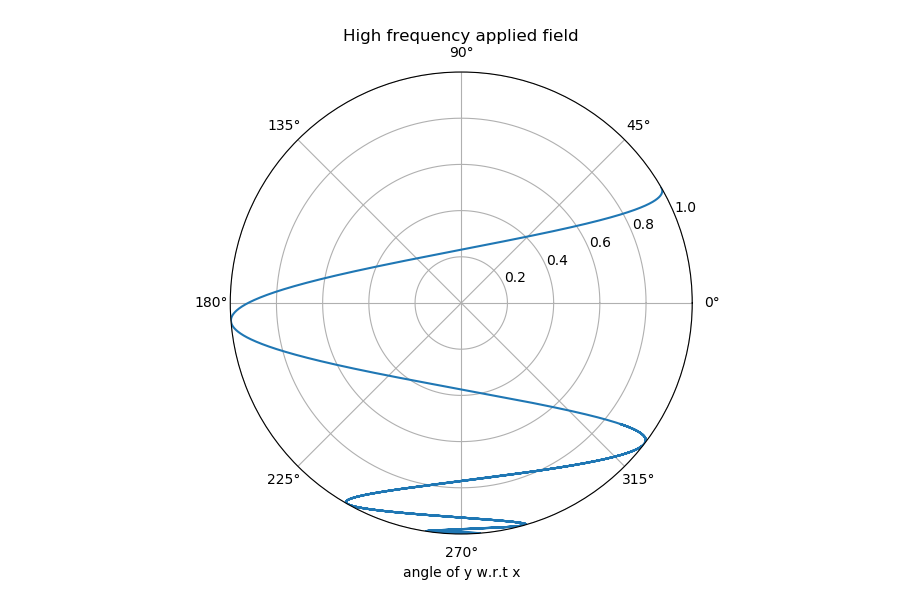

Text(0.5,1.05,'High frequency applied field')

In [49]:
r,theta = CartesianToPolar(mx_2M_f1,mz_2M_f1)

fig = plt.figure(figsize=(9,6))
plt.polar(theta, r)

plt.xlim(0,2*np.pi)
plt.xlabel("angle of y w.r.t x")

plt.ylim(0,1)
plt.title("High frequency applied field")

On this field since it has very high frequency can switch the magnetization and don't make it stable as in the last case. Here the magenetization switches to negative z very fast and then this component decreases towards 0. The magnetization is cyclic because of the high frequency sine applied fied. Notice that in this case we've used a different timestep of integration (smaller because the frequency is larger). We have to take care of this and there are some standard problems, some of them analytical, that can help us find the right step of integration. We'll see this in another notebook.